In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from keras import backend as K

Input data files are available in the "../input/" directory.
For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [45]:
from subprocess import check_output
print(check_output(["ls", "/content/data"]).decode("utf8"))

## Load dataset

In [57]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

The following code will help to sample the 25 random MNIST digits and visualize them.

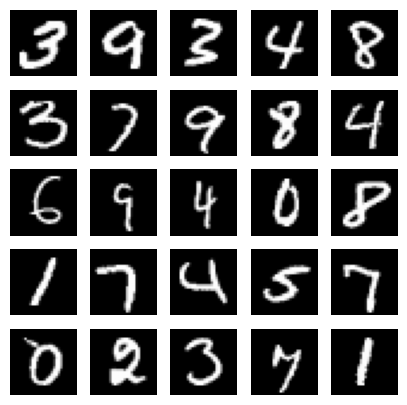

In [58]:
indexes = np.random.randint(0, x_train.shape[0], size = 25)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize = (5, 5))
for i in range(len(indexes)):
  plt.subplot(5, 5, i + 1)   # Create a 5x5 grid of subplots and select the (i+1)th position
  image = images[i]         # Extract the ith image from the dataset
  plt.imshow(image, cmap='gray')
  plt.axis('off')

plt.show()
plt.savefig('mnist_samples.png')
plt.close('all')

# Normalize

In [69]:
import cv2
import numpy as np

# Normalize MNIST images
x_train = x_train / 255.0
x_test = x_test / 255.0


# Reshape
# Add channel dimension
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [60]:
def preprocess_image(image_path):
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (28, 28))
  img = cv2.bitwise_not(img)
  img = img/255.0
  img = img.reshape(-1, 28, 28, 1)
  return img

# Build model

In [61]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation = 'softmax')
])


# Compile

In [62]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train

In [63]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(x_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.4728 - loss: 1.4652 - val_accuracy: 0.9311 - val_loss: 0.2365
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.8740 - loss: 0.3894 - val_accuracy: 0.9573 - val_loss: 0.1404
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9159 - loss: 0.2758 - val_accuracy: 0.9642 - val_loss: 0.1114
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9332 - loss: 0.2211 - val_accuracy: 0.9718 - val_loss: 0.0889
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9412 - loss: 0.1940 - val_accuracy: 0.9746 - val_loss: 0.0802


In [64]:
model.save("mnist_cnn_model.keras")

# Prediction

In [19]:
# Normalize
x_test = x_test / 255.0
x_test = x_test.reshape(-1, 28, 28, 1)

In [65]:
import numpy as np

# Predict probabilities
predictions = model.predict(x_test)

# Convert probabilities → class labels
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


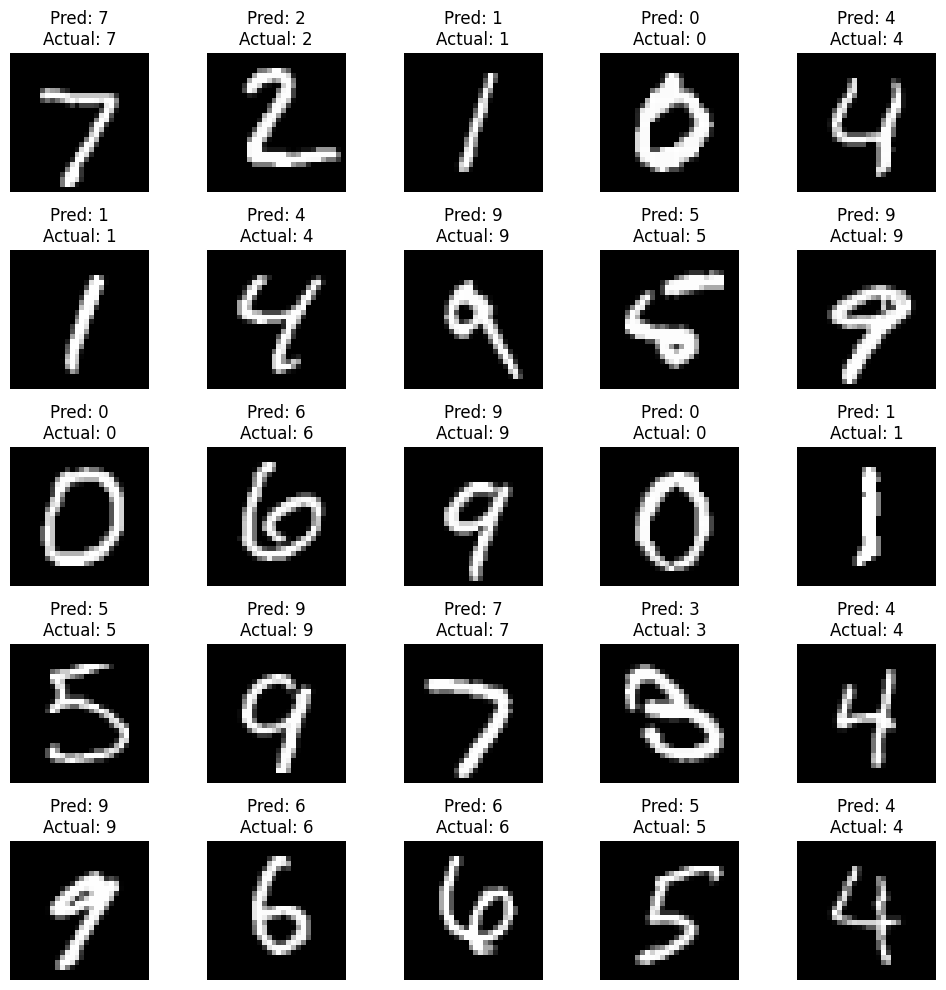

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nActual: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [33]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


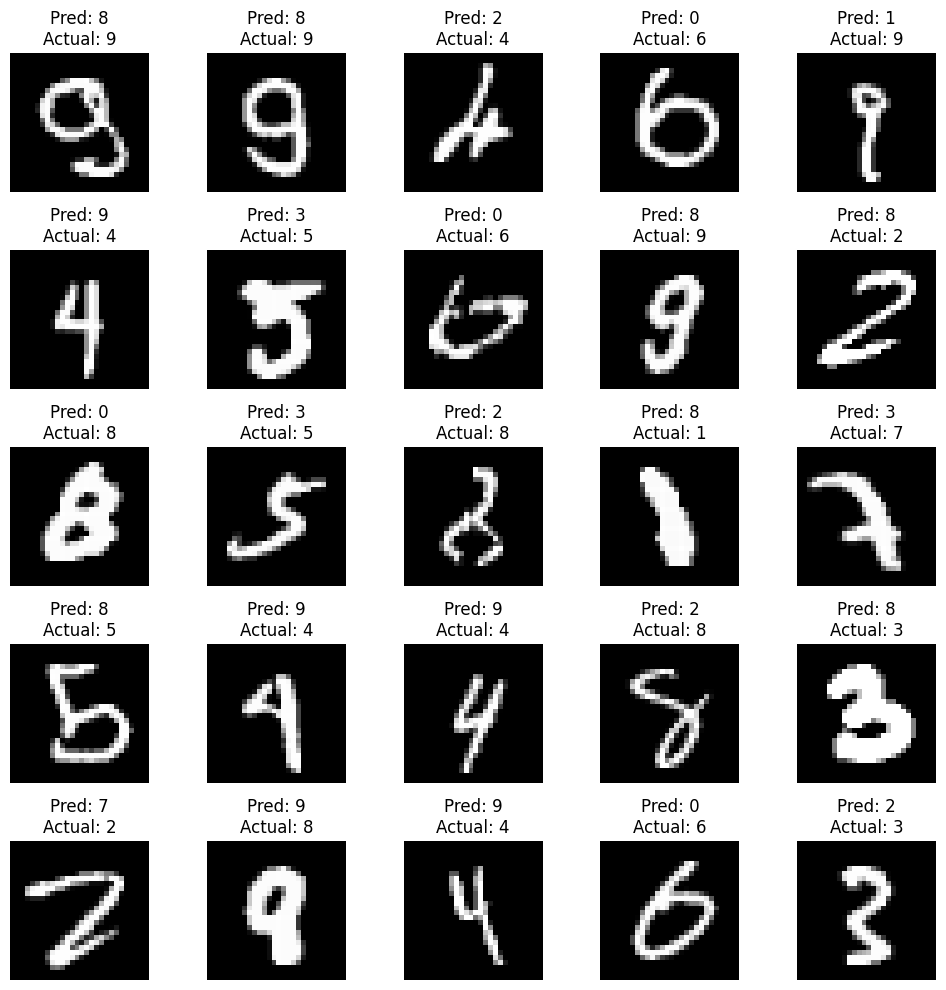

In [67]:
wrong_indexes = np.where(predicted_labels != y_test)[0]

plt.figure(figsize=(10, 10))

for i in range(25):
    idx = wrong_indexes[i]
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[idx]}\nActual: {y_test[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()